# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ta`u
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | albu kamal
Processing Record 4 of Set 1 | tromso
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | hammerfest
Processing Record 7 of Set 1 | udachny
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | saipan
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | wailua homesteads
Processing Record 14 of Set 1 | gizo
Processing Record 15 of Set 1 | krasnokamensk
Processing Record 16 of Set 1 | meiganga
Processing Record 17 of Set 1 | keflavik
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | rouyn-noranda
Processing Record 20 of Set 1 | khandyga
Processing Record 21 of Set 1 | atar
Processing Record 22 of Set 1 | burutu
Processing Record 23 of Set 1 | acarau

Processing Record 42 of Set 4 | acapulco de juarez
Processing Record 43 of Set 4 | hasaki
Processing Record 44 of Set 4 | mukdahan
Processing Record 45 of Set 4 | lata
Processing Record 46 of Set 4 | smach mean chey
City not found. Skipping...
Processing Record 47 of Set 4 | kaltungo
Processing Record 48 of Set 4 | chak two hundred forty-nine thal development authority
Processing Record 49 of Set 4 | sable-sur-sarthe
Processing Record 0 of Set 5 | manay
Processing Record 1 of Set 5 | college
Processing Record 2 of Set 5 | port saint john's
Processing Record 3 of Set 5 | odemira
Processing Record 4 of Set 5 | atafu village
Processing Record 5 of Set 5 | haiku-pauwela
Processing Record 6 of Set 5 | ugoofaaru
Processing Record 7 of Set 5 | iraquara
Processing Record 8 of Set 5 | molalla
Processing Record 9 of Set 5 | san antonio de pale
Processing Record 10 of Set 5 | naze
Processing Record 11 of Set 5 | kisesa
Processing Record 12 of Set 5 | weno
Processing Record 13 of Set 5 | axim
Proc

Processing Record 33 of Set 8 | berezovo
Processing Record 34 of Set 8 | dakhla
Processing Record 35 of Set 8 | edirne
Processing Record 36 of Set 8 | las tablas
Processing Record 37 of Set 8 | sakchu-up
Processing Record 38 of Set 8 | enewetak
Processing Record 39 of Set 8 | isle of lewis
City not found. Skipping...
Processing Record 40 of Set 8 | port hedland
Processing Record 41 of Set 8 | caluula
Processing Record 42 of Set 8 | kerema
Processing Record 43 of Set 8 | palmer
Processing Record 44 of Set 8 | prado
Processing Record 45 of Set 8 | mulanje
Processing Record 46 of Set 8 | yelizovo
Processing Record 47 of Set 8 | rikaze
Processing Record 48 of Set 8 | vilyuysk
Processing Record 49 of Set 8 | sisimiut
Processing Record 0 of Set 9 | bandarbeyla
Processing Record 1 of Set 9 | tevragh zeina
City not found. Skipping...
Processing Record 2 of Set 9 | duong dong
Processing Record 3 of Set 9 | south hedland
Processing Record 4 of Set 9 | zaozersk
Processing Record 5 of Set 9 | nar'

Processing Record 21 of Set 12 | manturovo
Processing Record 22 of Set 12 | taoudenni
Processing Record 23 of Set 12 | agdam
Processing Record 24 of Set 12 | garoowe
Processing Record 25 of Set 12 | colonia
Processing Record 26 of Set 12 | bardai
Processing Record 27 of Set 12 | brady
Processing Record 28 of Set 12 | pontes e lacerda
Processing Record 29 of Set 12 | zheleznodorozhnyy
Processing Record 30 of Set 12 | moranbah
Processing Record 31 of Set 12 | thurso
Processing Record 32 of Set 12 | bibiani
Processing Record 33 of Set 12 | priargunsk
Processing Record 34 of Set 12 | arkalyk
Processing Record 35 of Set 12 | venice
Processing Record 36 of Set 12 | miyaly
Processing Record 37 of Set 12 | petropavlivka
Processing Record 38 of Set 12 | sungailiat
Processing Record 39 of Set 12 | nyazepetrovsk
Processing Record 40 of Set 12 | tangalle
Processing Record 41 of Set 12 | port hueneme
Processing Record 42 of Set 12 | kajatian
Processing Record 43 of Set 12 | le pouliguen
Processing 

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ta`u,-14.2336,-169.5144,299.28,74,100,6.62,AS,1690527090
1,adamstown,-25.0660,-130.1015,293.70,69,45,4.46,PN,1690527090
2,albu kamal,34.4500,40.9186,310.43,15,0,6.33,SY,1690527091
3,tromso,69.6496,18.9570,286.14,87,75,2.57,NO,1690527091
4,bethel,41.3712,-73.4140,296.35,90,0,1.54,US,1690527091


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ta`u,-14.2336,-169.5144,299.28,74,100,6.62,AS,1690527090
1,adamstown,-25.0660,-130.1015,293.70,69,45,4.46,PN,1690527090
2,albu kamal,34.4500,40.9186,310.43,15,0,6.33,SY,1690527091
3,tromso,69.6496,18.9570,286.14,87,75,2.57,NO,1690527091
4,bethel,41.3712,-73.4140,296.35,90,0,1.54,US,1690527091


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

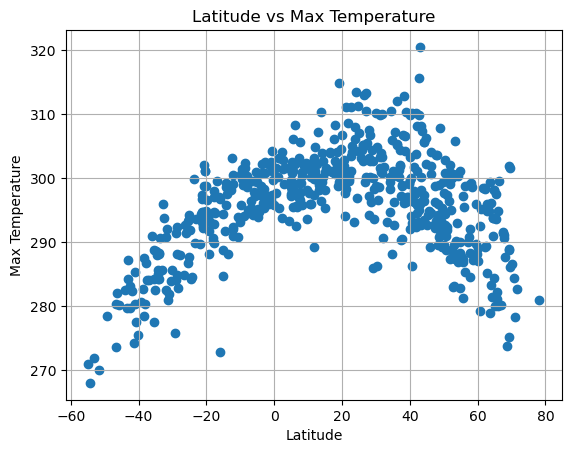

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Max Temperature")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

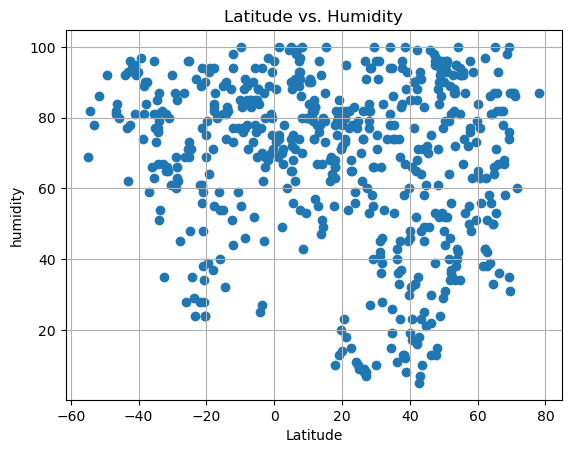

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

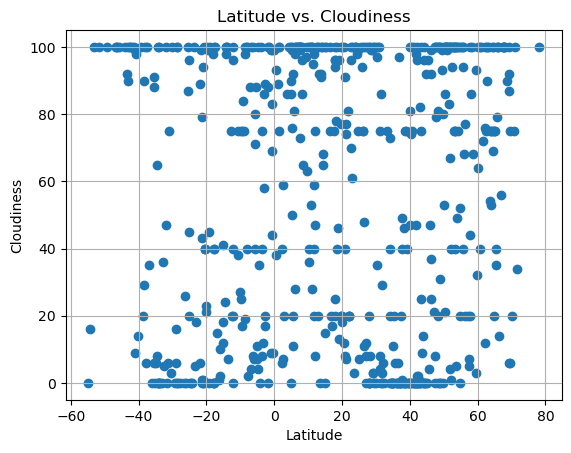

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

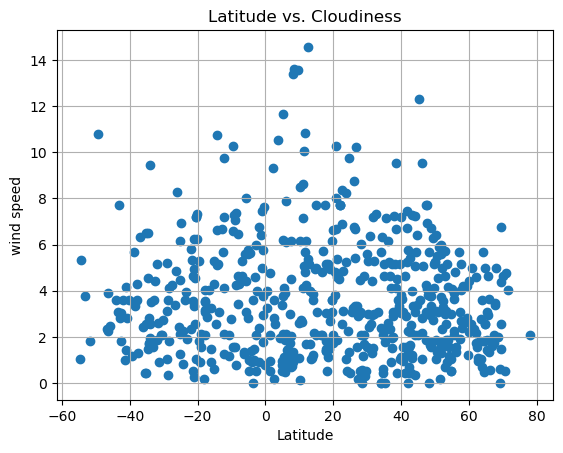

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("wind speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots

In [30]:
#Ceate a DataFrame with the Northern Hemisphere data (Latitude >= 0)
filtered_north = city_data_df[(city_data_df['Lat'] >= 0)]
northern_hemi_df= pd.DataFrame(filtered_north)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,albu kamal,34.4500,40.9186,310.43,15,0,6.33,SY,1690527091
3,tromso,69.6496,18.9570,286.14,87,75,2.57,NO,1690527091
4,bethel,41.3712,-73.4140,296.35,90,0,1.54,US,1690527091
5,hammerfest,70.6634,23.6821,284.40,87,75,0.51,NO,1690527091
6,udachny,66.4167,112.4000,299.51,36,14,0.54,RU,1690527091


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
filtered_south = city_data_df[(city_data_df['Lat'] < 0)]
southern_hemi_df= pd.DataFrame(filtered_south)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ta`u,-14.2336,-169.5144,299.28,74,100,6.62,AS,1690527090
1,adamstown,-25.0660,-130.1015,293.70,69,45,4.46,PN,1690527090
8,blackmans bay,-43.0167,147.3167,287.22,62,90,2.80,AU,1690527092
10,puerto natales,-51.7236,-72.4875,270.05,86,100,1.82,CL,1690527092
13,gizo,-8.1030,156.8419,300.35,85,100,6.44,SB,1690527093


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:  -0.5014731529796036


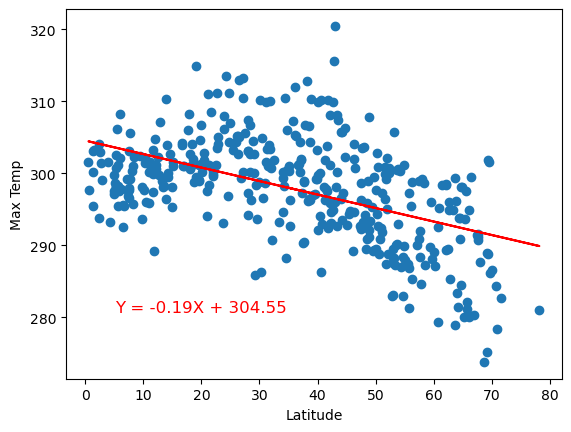

In [33]:
# Linear regression on Northern Hemisphere

# Get the latitude for x and and Temp for y from northern_hemi_df:
X = northern_hemi_df['Lat']
Y = northern_hemi_df['Max Temp']

# Perform linear regression:
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

 # Find r-value:
r_value, _ = pearsonr(X, Y)
print("The r-value is: ",r_value)

# Create line equation
regression_line_eq = f'Y = {slope:.2f}X + {intercept:.2f}'
#Create the linear regression graph
plt.scatter(X, Y,)
predicted_Y = slope * X + intercept
plt.plot(X, predicted_Y, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp" )
plt.annotate(regression_line_eq, xy=(0.10, 0.18), xycoords='axes fraction', fontsize=12, color='red')
plt.show()

The r-value is:  0.8321852412087998


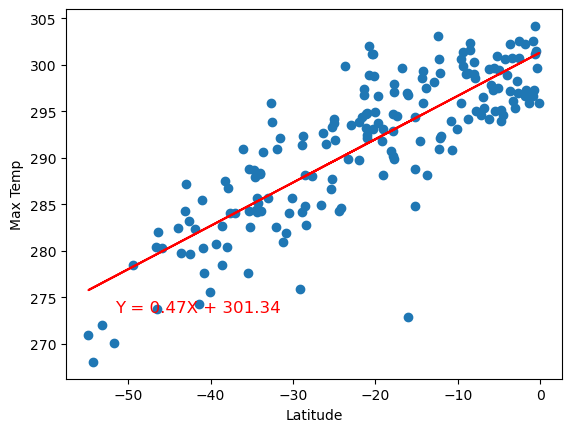

In [34]:
# Linear regression on Southern Hemisphere
X = southern_hemi_df['Lat']
Y = southern_hemi_df['Max Temp']

# Perform linear regression:
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

 # Find r-value:
r_value, _ = pearsonr(X, Y)
print("The r-value is: ",r_value)

# Create line equation
regression_line_eq = f'Y = {slope:.2f}X + {intercept:.2f}'
#Create the linear regression graph
plt.scatter(X, Y,)
predicted_Y = slope * X + intercept
plt.plot(X, predicted_Y, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp" )
plt.annotate(regression_line_eq, xy=(0.10, 0.18), xycoords='axes fraction', fontsize=12, color='red')
plt.show()

**Discussion about the linear relationship:** Negative linear relationship between the Latitude and the maximum teperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is:  -0.10462485310294505


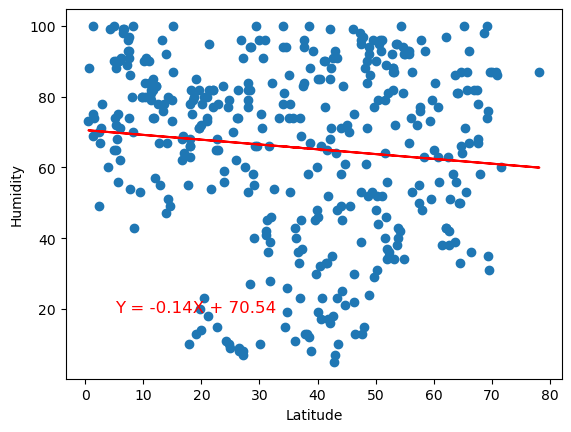

In [35]:
# Northern Hemisphere
X = northern_hemi_df['Lat']
Y = northern_hemi_df['Humidity']

# Perform linear regression:
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

 # Find r-value:
r_value, _ = pearsonr(X, Y)
print("The r-value is: ",r_value)

# Create line equation
regression_line_eq = f'Y = {slope:.2f}X + {intercept:.2f}'
#Create the linear regression graph
plt.scatter(X, Y,)
predicted_Y = slope * X + intercept
plt.plot(X, predicted_Y, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity" )
plt.annotate(regression_line_eq, xy=(0.10, 0.18), xycoords='axes fraction', fontsize=12, color='red')
plt.show()

The r-value is:  -0.07786637396752222


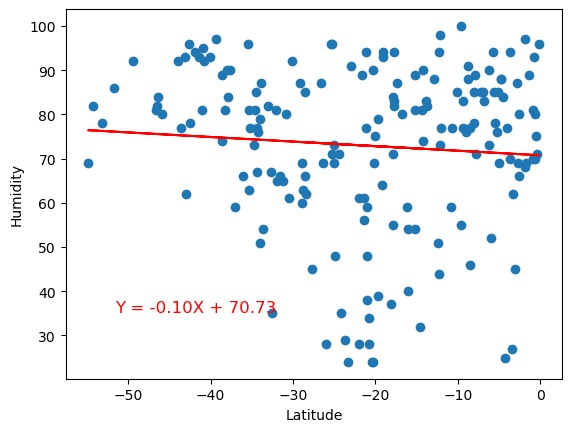

In [36]:
# Southern Hemisphere
X = southern_hemi_df['Lat']
Y = southern_hemi_df['Humidity']

# Perform linear regression:
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

 # Find r-value:
r_value, _ = pearsonr(X, Y)
print("The r-value is: ",r_value)

# Create line equation
regression_line_eq = f'Y = {slope:.2f}X + {intercept:.2f}'
#Create the linear regression graph
plt.scatter(X, Y,)
predicted_Y = slope * X + intercept
plt.plot(X, predicted_Y, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity" )
plt.annotate(regression_line_eq, xy=(0.10, 0.18), xycoords='axes fraction', fontsize=12, color='red')
plt.show()

**Discussion about the linear relationship:** Since the slope is negative, we can say that there a slightly negative relatioship between the Latitude and the humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:  -0.02004451956989277


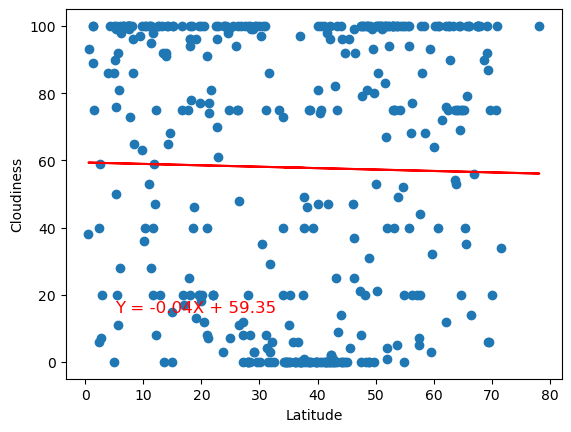

In [37]:
# Northern Hemisphere
X = northern_hemi_df['Lat']
Y = northern_hemi_df['Cloudiness']

# Perform linear regression:
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

 # Find r-value:
r_value, _ = pearsonr(X, Y)
print("The r-value is: ",r_value)

# Create line equation
regression_line_eq = f'Y = {slope:.2f}X + {intercept:.2f}'
#Create the linear regression graph
plt.scatter(X, Y,)
predicted_Y = slope * X + intercept
plt.plot(X, predicted_Y, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness" )
plt.annotate(regression_line_eq, xy=(0.10, 0.18), xycoords='axes fraction', fontsize=12, color='red')
plt.show()

The r-value is:  -0.04788531090375267


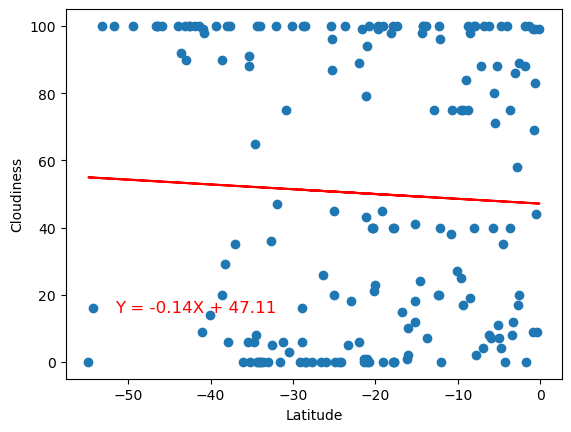

In [38]:
# Southern Hemisphere
X = southern_hemi_df['Lat']
Y = southern_hemi_df['Cloudiness']

# Perform linear regression:
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

 # Find r-value:
r_value, _ = pearsonr(X, Y)
print("The r-value is: ",r_value)

# Create line equation
regression_line_eq = f'Y = {slope:.2f}X + {intercept:.2f}'
#Create the linear regression graph
plt.scatter(X, Y,)
predicted_Y = slope * X + intercept
plt.plot(X, predicted_Y, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness" )
plt.annotate(regression_line_eq, xy=(0.10, 0.18), xycoords='axes fraction', fontsize=12, color='red')
plt.show()

**Discussion about the linear relationship:** We can see a negative linear relationship between the latidute and the cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:  -0.1717234707165592


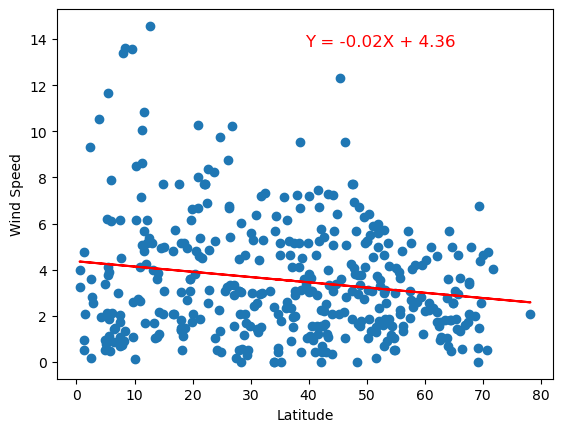

In [39]:
# Northern Hemisphere
X = northern_hemi_df['Lat']
Y = northern_hemi_df['Wind Speed']

# Perform linear regression:
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

 # Find r-value:
r_value, _ = pearsonr(X, Y)
print("The r-value is: ",r_value)

# Create line equation
regression_line_eq = f'Y = {slope:.2f}X + {intercept:.2f}'
#Create the linear regression graph
plt.scatter(X, Y,)
predicted_Y = slope * X + intercept
plt.plot(X, predicted_Y, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed" )
plt.annotate(regression_line_eq, xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, color='red')
plt.show()

The r-value is:  0.09481735240928515


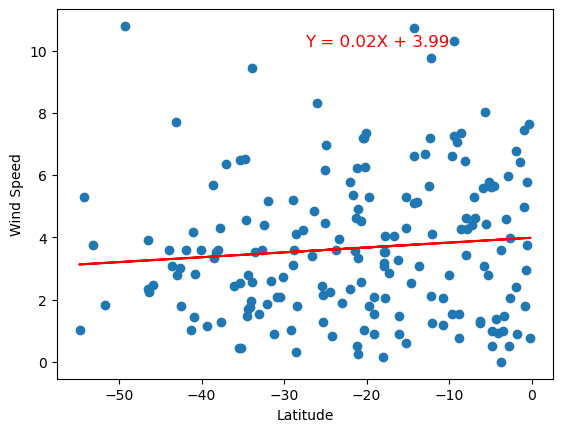

In [40]:
# Southern Hemisphere
X = southern_hemi_df['Lat']
Y = southern_hemi_df['Wind Speed']

# Perform linear regression:
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

 # Find r-value:
r_value, _ = pearsonr(X, Y)
print("The r-value is: ",r_value)

# Create line equation
regression_line_eq = f'Y = {slope:.2f}X + {intercept:.2f}'
#Create the linear regression graph
plt.scatter(X, Y,)
predicted_Y = slope * X + intercept
plt.plot(X, predicted_Y, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed" )
plt.annotate(regression_line_eq, xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, color='red')
plt.show()

**Discussion about the linear relationship:** Northern Hemisphere has a negative linear relationship between the wind speed and the latitude. Meanwhile,in the Southern Hemisphere there is a positive linear relatioship. 